In [52]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#
from mpl_toolkits.mplot3d import Axes3D

import sys
#print(sys.path)
sys.path.append("/Users/marcsauer/PycharmProjects/Swim/src/")
from preprocessing import Preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
pre = Preprocessing('test5')

In [55]:
raw_accel = pre.load_data('accel-175130000657-20190403T122134Z.csv', name='raw_accel', header=None)
raw_gyro = pre.load_data('gyro-175130000657-20190403T122135Z.csv', name='raw_gyro', header=None)
raw_magn = pre.load_data('magn-175130000657-20190403T122134Z.csv', name='raw_magn', header=None)

In [56]:
column_names = ['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Magn_X', 'Magn_Y', 'Magn_Z']

In [57]:
raw_all = pd.concat([raw_accel, raw_gyro, raw_magn], axis=1, sort=False)

In [59]:
raw_all.columns = column_names

In [91]:
raw_all.head(5)

,Accel_X,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z,Magn_X,Magn_Y,Magn_Z
0,-1.660678,0.811196,-9.827674,-4.760000,-0.56,-0.21,-63.000004,-62.550003,166.350006
1,-1.634356,0.748980,-9.662563,-4.760000,0.00,0.91,-63.300003,-61.350002,167.100006
2,-1.483603,0.689158,-9.361056,-4.060000,-1.26,0.56,-64.500000,-61.950001,166.800003
3,-1.883219,0.696336,-9.672134,-10.430000,-2.31,-1.33,-64.050003,-61.050003,168.000000
4,-1.718108,0.973914,-9.760673,-18.690001,-3.64,-4.69,-64.950005,-61.350002,167.850006


In [98]:
Magn_Y_max = raw_all['Magn_Y'].max()
print(Magn_Y_max)

Magn_Y_max = raw_all['Magn_Y'].max()
Magn_Y_min
min_max_range = Magn_Y_max-Magn_Y_min
print(min_max_range)
min_max_range*.2
Magn_Y_max-(min_max_range*.25)

-25.050001
58.199999


-39.60000075

In [ ]:
# Erstelle DataFrame für jeden Zug
def single_stroke(raw_data):
    # Define stroke cut
    Magn_Y_max = raw_data['Magn_Y'].max()
    Magn_Y_min = raw_data['Magn_Y'].min()
    min_max_range = Magn_Y_max-Magn_Y_min
    stroke_cut = Magn_Y_max-(min_max_range*.25)
    
    single_stroke = []
    
    for value in raw_data['Magn_Y']:
        if value < stroke_cut:
            single_stroke.append(value.)
        else:
            break

In [127]:
stroke_cut=-39
liste =[]
for i in range(0,len(raw_all['Magn_Y'])):
    if (raw_all['Magn_Y'][i] > stroke_cut) == True and (raw_all['Magn_Y'][i-1] < stroke_cut) == True:
        liste.append(i)

In [130]:
liste

[38,
 79,
 115,
 148,
 183,
 217,
 252,
 285,
 318,
 353,
 388,
 424,
 458,
 495,
 531,
 564,
 600,
 636,
 670,
 704,
 737,
 770,
 804,
 837,
 871,
 905,
 939,
 972,
 1005,
 1038,
 1071,
 1106,
 1141,
 1178,
 1215,
 1255,
 1292,
 1328,
 1364,
 1402,
 1438,
 1478,
 1515,
 1550,
 1589,
 1628,
 1667,
 1707,
 1747,
 1787,
 1827,
 1870,
 1910,
 1949]

In [133]:
for i in range(0,len(liste)):
    length = liste[i+1]-liste[i]
    print(length)

41
36
33
35
34
35
33
33
35
35
36
34
37
36
33
36
36
34
34
33
33
34
33
34
34
34
33
33
33
33
35
35
37
37
40
37
36
36
38
36
40
37
35
39
39
39
40
40
40
40
43
40
39


IndexError: list index out of range

In [122]:
1*(raw_all['Magn_Y'][100]<stroke_cut)

1

<IPython.core.display.Javascript object>


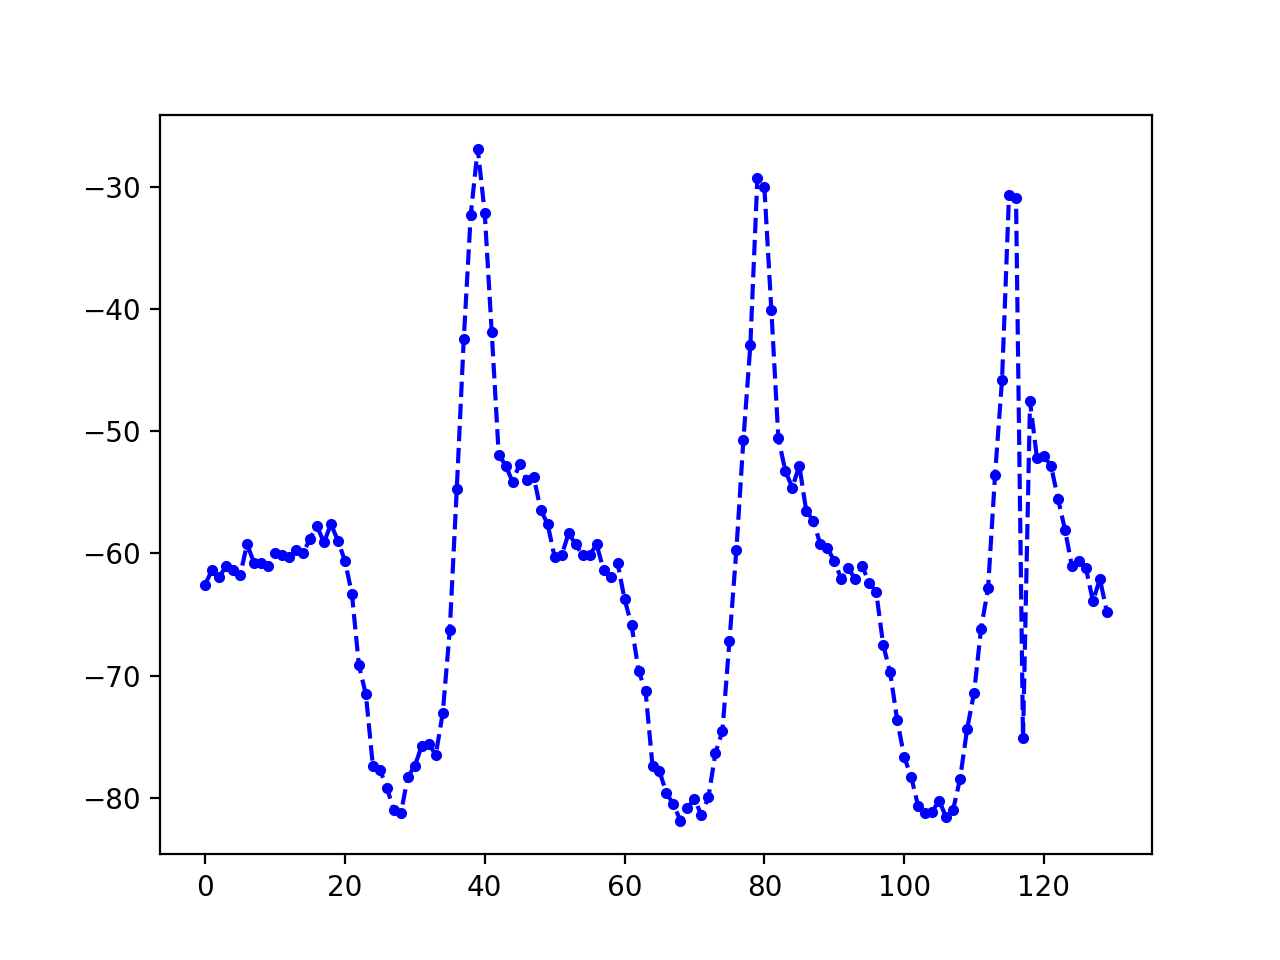

In [126]:
#plt.plot(raw_all[:60].index, raw_all[:60]['Magn_X'])
plt.plot(raw_all[:130].index, raw_all[:130]['Magn_Y'],'b.--')
#plt.plot(raw_all[:60].index, raw_all[:60]['Magn_Z'])

# plt.plot(raw_all[60:120].index, raw_all[60:120]['Magn_X'])
# plt.plot(raw_all[60:120].index, raw_all[60:120]['Magn_Y'])
# plt.plot(raw_all[60:120].index, raw_all[60:120]['Magn_Z'])
# 

plt.show()

In [67]:
raw_all.shape

(2034, 9)

<IPython.core.display.Javascript object>


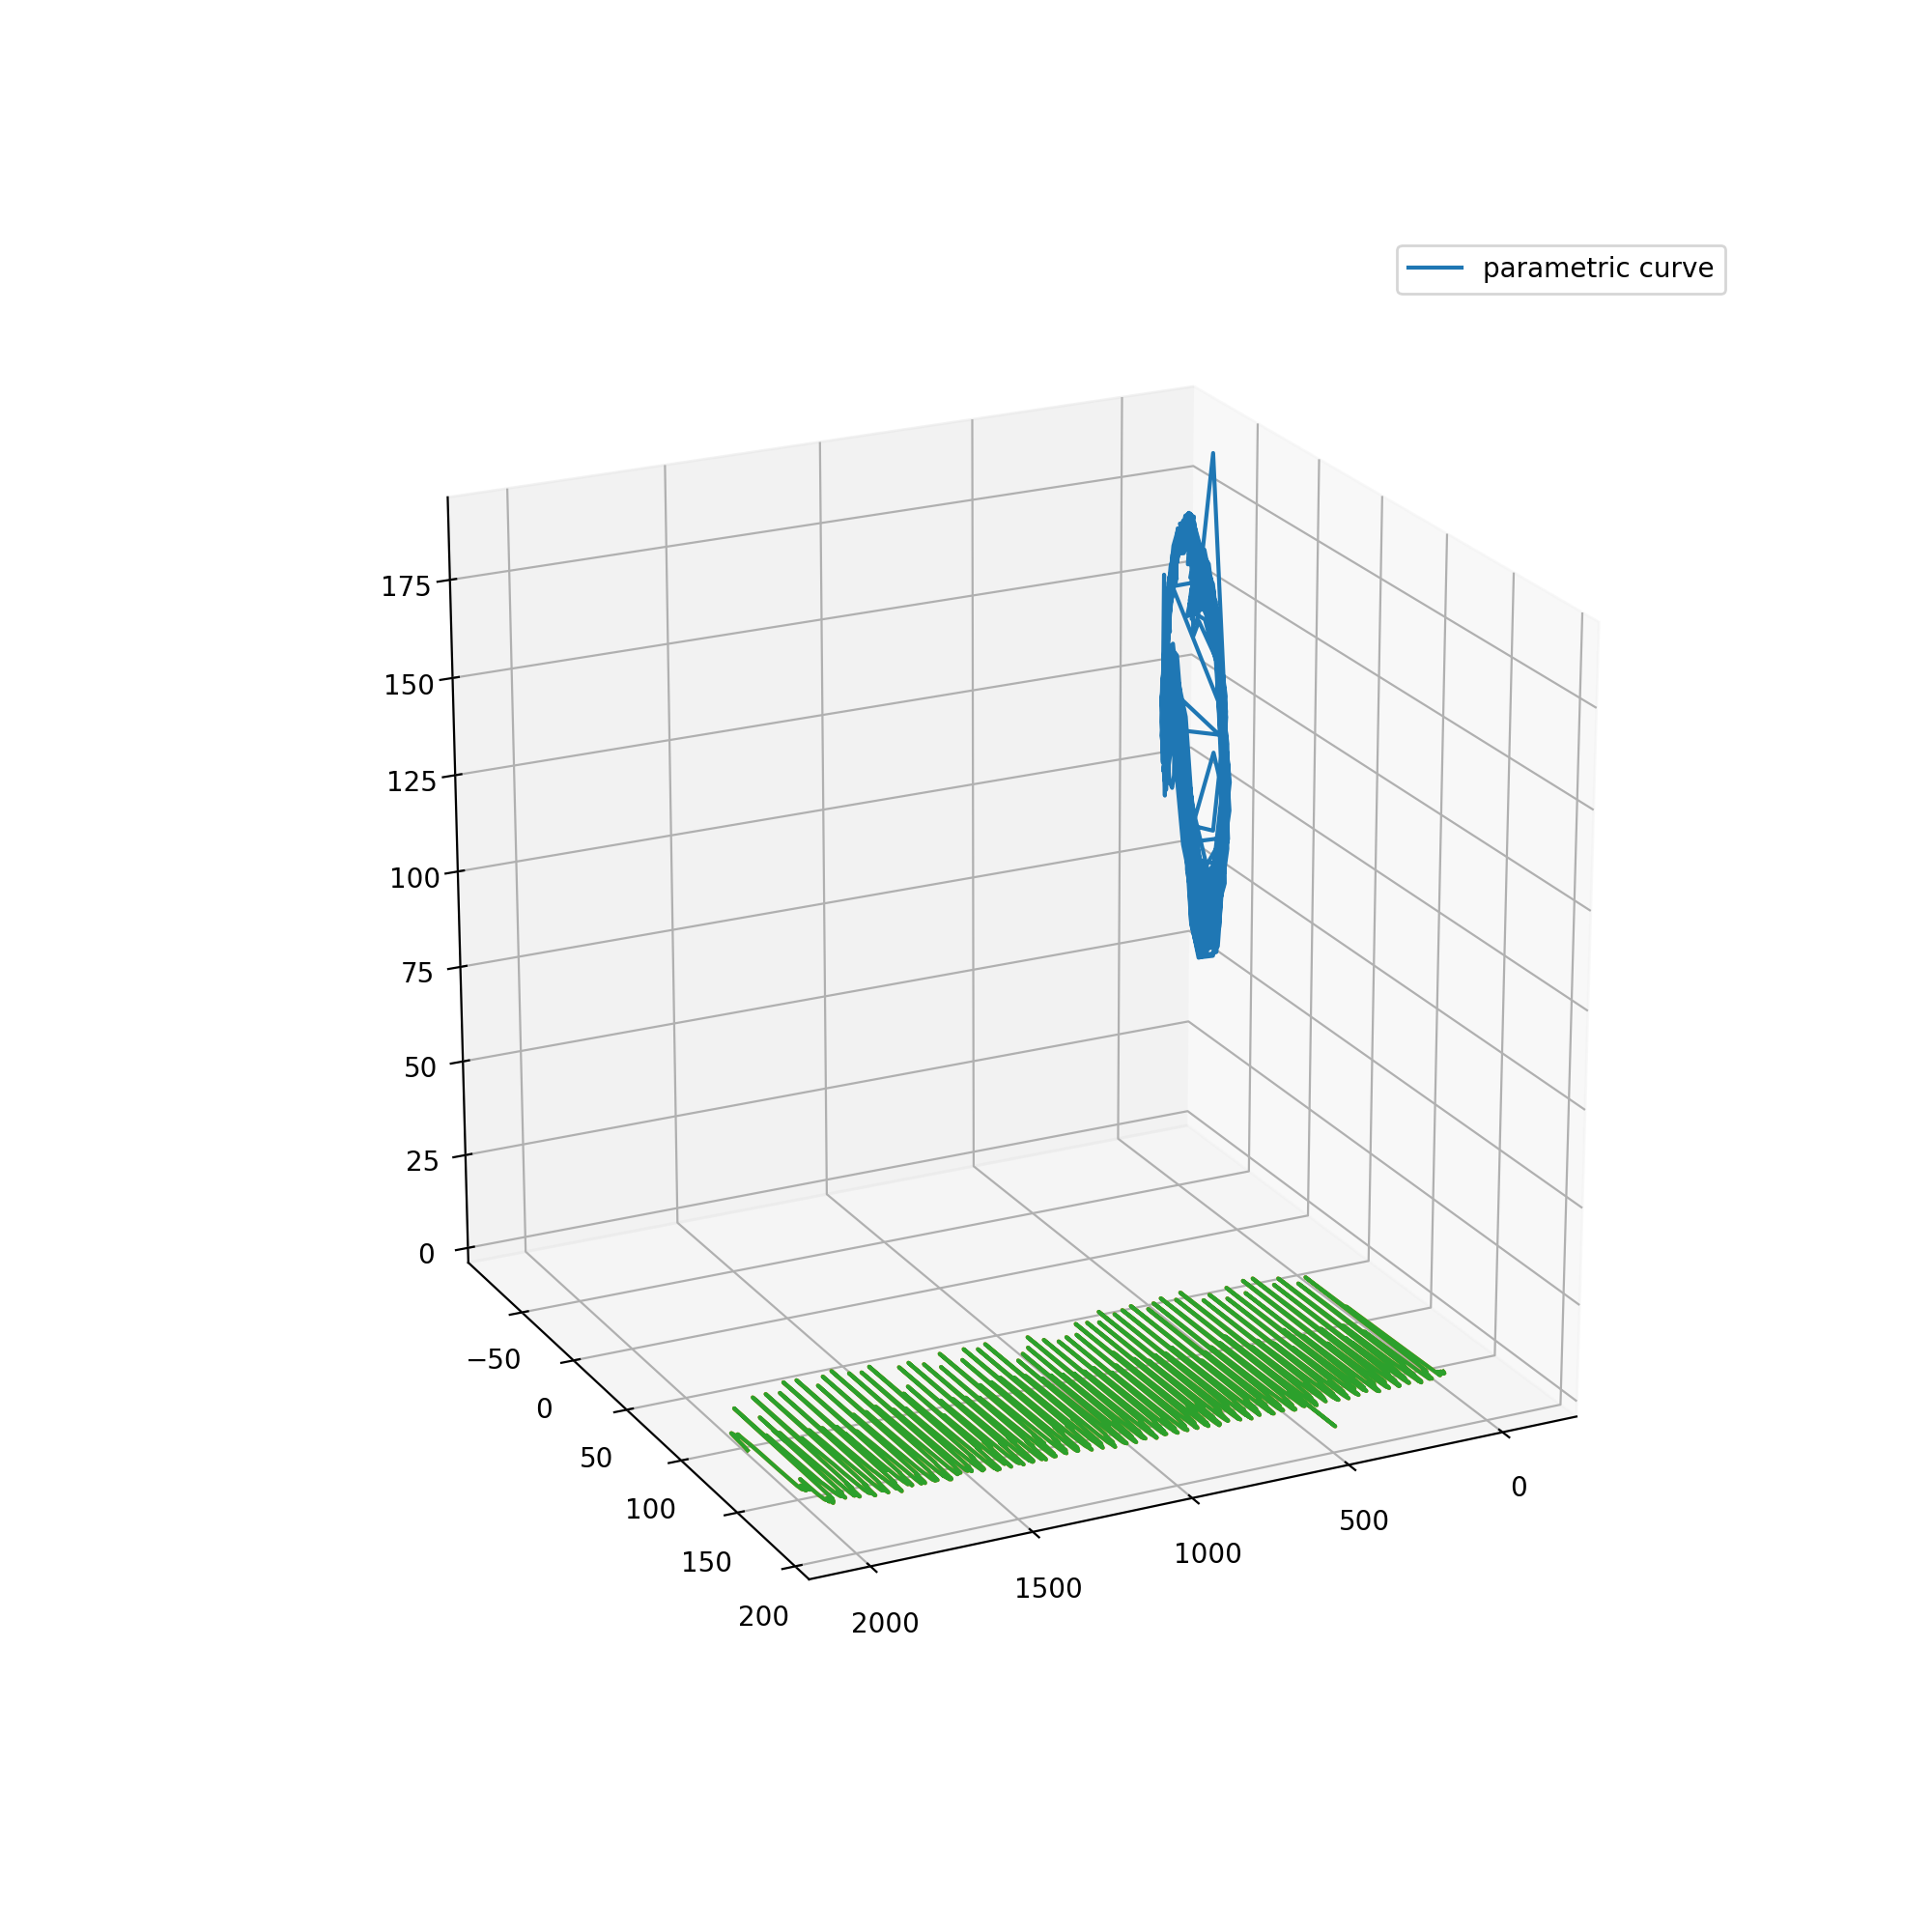

In [78]:
# 13 Hz
raw_accel = pre.load_data('accel-175130000657-20190403T122134Z.csv', name='raw_accel', header=None)
raw_gyro = pre.load_data('gyro-175130000657-20190403T122135Z.csv', name='raw_gyro', header=None)
raw_magn = pre.load_data('magn-175130000657-20190403T122134Z.csv', name='raw_magn', header=None)

raw_all = pd.concat([raw_accel, raw_gyro, raw_magn], axis=1, sort=False)
raw_all.columns = column_names

fig = plt.figure(10, figsize= (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(raw_all['Magn_X'], raw_all['Magn_Y'], raw_all['Magn_Z'], label='parametric curve')
ax.legend()

plt.show()